# Graphiques du Tableau pour Cerlico : Entités nommées

### Importation des modules

- pickle pour la récupération des données de Conscila
- pandas pour la gestion des csv et les calculs type excel
- numpy pour les calculs en général
- matplotlib pour les graphiques

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy,datetime,pickle,re,codecs,unidecode
import io
from lxml import etree
from IPython.display import display

In [157]:
pd.__version__

u'0.23.1'

In [158]:
%matplotlib inline

In [159]:
import seaborn as sns
sns.set(style="ticks")
sns.set_style("whitegrid")
sns.set_palette("husl")
#sns.palplot(sns.color_palette("hls", 20))
sns.set_context("paper")
sns.set_context("notebook")

In [160]:
spkNoms={"spk1":"journaliste","spk2":"expert","spk3":"terrain"}

In [161]:
with open("partieGlobale.pkl","rb") as inFile:
    dfComplet=pickle.load(inFile)

In [162]:
dfComplet["excitation"]=pd.to_numeric(dfComplet["excitation"], errors='coerce')

## Interpolation des valeurs numériques

In [163]:
dfMatch=dfComplet.iloc[:15700].set_index("timeline")
for c in ["excitation","RJ5.00","D5.00","V5.00"]+"S1D5.00 S2D5.00 S3D5.00 V5.00 S1V5.00 S2V5.00 S3V5.00".split(" "):
    dfMatch[c]=dfMatch[c].interpolate(method="index")

## Remise à zéro des valeurs numériques pendant la mi-temps

In [164]:
for c in ["excitation","RJ5.00","D5.00","V5.00"]+"S1D5.00 S2D5.00 S3D5.00 V5.00 S1V5.00 S2V5.00 S3V5.00".split(" "): 
    dfMatch.loc[(dfMatch.index>271985)&(dfMatch.index<325843),c]=0

In [165]:
dfMatch[((dfMatch.index>271985)&(dfMatch.index<325843))][["excitation","RJ5.00"]]
#dfMatch.columns

,excitation,RJ5.00
timeline,,
272000.0,0.0,0.0
272100.0,0.0,0.0
272200.0,0.0,0.0
272300.0,0.0,0.0
272400.0,0.0,0.0
272500.0,0.0,0.0
272600.0,0.0,0.0
272700.0,0.0,0.0
272800.0,0.0,0.0


# Traitement des corrections manuelles des Entités nommées

In [166]:
dfXLS=pd.read_excel("partieGlobale-Joueurs-CM.xlsx")

In [167]:
dfNomsXLS=dfXLS[dfXLS["joueurs"].notnull()].set_index("timeline")[["noms","joueurs"]]

In [168]:
dfMatch.update(dfNomsXLS)

In [169]:
dfMatch[dfMatch["joueurs"].notnull()][["noms","joueurs"]]

,noms,joueurs
timeline,,
3616.0,David Skrela,David Skrela=Fr
4232.0,Roncero,Rodrigo Roncero=Ar
4456.0,Pichot,Agustín Pichot=Ar
4656.0,Hernandez,Juan Martín Hernández=Ar
7144.0,Raphaël Ibañez,Raphaël Ibañez=Fr
8120.0,Pichot,Agustín Pichot=Ar
8472.0,Cédric Heymans,Cédric Heymans=Fr
8844.0,Pichot,Agustín Pichot=Ar
9092.0,Heymans,Cédric Heymans=Fr


In [170]:
selectColonnesNoms="noms joueurs excitation émotion discours texte début fin RJ5.00 D5.00 S1D5.00".split(" ")
dfNomsMatch=dfMatch[selectColonnesNoms]

In [171]:
dfNomsMatch

,noms,joueurs,excitation,émotion,discours,texte,début,fin,RJ5.00,D5.00,S1D5.00
timeline,,,,,,,,,,,
3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,1.300,1.300
3100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,2.000,2.000
3200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,2.400,2.400
3220.0,NaN,NaN,2.0,,narration,après avoir demandé si tout le monde était prê...,32.20,35.92,0.100,2.480,2.480
3254.0,NaN,NaN,2.0,NaN,NaN,NaN,32.54,36.90,0.270,2.616,2.616
3300.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.500,2.800,2.800
3349.0,NaN,NaN,2.0,NaN,NaN,NaN,33.49,33.53,0.500,2.947,2.947
3400.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.500,3.100,3.100
3479.0,NaN,NaN,2.0,NaN,NaN,NaN,34.79,35.01,0.500,3.179,3.179


In [172]:
setJoueurs=set()
for j in list(dfMatch[dfMatch["joueurs"].notnull()]["joueurs"].unique()):
    if j=="":
        pass
    elif ";" in j:
        for lJ in j.split(";"):
            setJoueurs.add(lJ)
    else:
        setJoueurs.add(j)
setJoueurs

{u'Agust\xedn Pichot=Ar',
 u'Aur\xe9lien Rougerie=Fr',
 u'Bernard Laporte=Fr',
 u'Christophe Dominici=Fr',
 u'C\xe9dric Heymans=Fr',
 u'Damien Traille=Fr',
 u'David Ellis=En',
 u'David Skrela=Fr',
 u'Dimitri Szarzewski=Fr',
 u'Fabien Pelous=Fr',
 u'Fabrice Landreau=Ot',
 u'Felipe Contepomi=Ar',
 u'Fr\xe9d\xe9ric Michalak=Fr',
 u'Hern\xe1n Senillosa=Ar',
 u'Ignacio Corleto=Ar',
 u'Ignacio Fern\xe1ndez Lobbe=Ar',
 u'Imanol Harinordoquy=Fr',
 u'Jean-Baptiste Poux=Fr',
 u'Jean-Baptiste \xc9lissalde=Fr',
 u'Jo Maso=Fr',
 u'Juan Manuel Leguizam\xf3n=Ar',
 u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar',
 u'Juan Mart\xedn Hern\xe1ndez=Ar',
 u'Julien Bonnaire=Fr',
 u'J\xe9r\xf4me Thion=Fr',
 u'Lucas Borges=Ar',
 u'Lucas Ostiglia=Ar',
 u'Manuel Contepomi=Ar',
 u'Marcelo Loffreda=Ar',
 u'Mario Ledesma=Ar',
 u'Mart\xedn Scelzo=Ar',
 u'Olivier Milloud=Fr',
 u'Patricio Albacete=Ar',
 u'Pierre Mignoni=Fr',
 u'Pieter de Villiers=Fr',
 u'Rapha\xebl Iba\xf1ez=Fr',
 u'Rimas \xc1lvarez Kairelis=Ar',
 u'Rodrigo R

In [233]:
for j in setJoueurs:
        dfNomsMatch[j]=dfNomsMatch[j].apply(lambda x: np.array([0,0,0,0]))

In [236]:
joueurDenominations={}
for jp in setJoueurs:
    j=jp.split("=")[0]
    joueurDenominations[jp]=[j.split(" ")[0],j.split(" ")[1],j," ".join(j.split(" ")[1:])]
joueurDenominations

{u'Agust\xedn Pichot=Ar': [u'Agust\xedn',
  u'Pichot',
  u'Agust\xedn Pichot',
  u'Pichot'],
 u'Aur\xe9lien Rougerie=Fr': [u'Aur\xe9lien',
  u'Rougerie',
  u'Aur\xe9lien Rougerie',
  u'Rougerie'],
 u'Bernard Laporte=Fr': [u'Bernard',
  u'Laporte',
  u'Bernard Laporte',
  u'Laporte'],
 u'Christophe Dominici=Fr': [u'Christophe',
  u'Dominici',
  u'Christophe Dominici',
  u'Dominici'],
 u'C\xe9dric Heymans=Fr': [u'C\xe9dric',
  u'Heymans',
  u'C\xe9dric Heymans',
  u'Heymans'],
 u'Damien Traille=Fr': [u'Damien', u'Traille', u'Damien Traille', u'Traille'],
 u'David Ellis=En': [u'David', u'Ellis', u'David Ellis', u'Ellis'],
 u'David Skrela=Fr': [u'David', u'Skrela', u'David Skrela', u'Skrela'],
 u'Dimitri Szarzewski=Fr': [u'Dimitri',
  u'Szarzewski',
  u'Dimitri Szarzewski',
  u'Szarzewski'],
 u'Fabien Pelous=Fr': [u'Fabien', u'Pelous', u'Fabien Pelous', u'Pelous'],
 u'Fabrice Landreau=Ot': [u'Fabrice',
  u'Landreau',
  u'Fabrice Landreau',
  u'Landreau'],
 u'Felipe Contepomi=Ar': [u'Felipe

In [237]:
for jp in joueurDenominations:
    joueurDenominations[jp]=[unidecode.unidecode(k) for k in joueurDenominations[jp]]
    if joueurDenominations[jp][1]==joueurDenominations[jp][3]:
        joueurDenominations[jp][3]=None
joueurDenominations[u'Juan Mart\xedn Hern\xe1ndez=Ar'][0]="Juan Martin"
joueurDenominations[u'Juan Mart\xedn Hern\xe1ndez=Ar'][1]="Hernandez"
joueurDenominations[u'Juan Mart\xedn Hern\xe1ndez=Ar'][3]=None
joueurDenominations[u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar'][0]="Juan Martin"
joueurDenominations[u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar'][1]="Fernandez"
joueurDenominations[u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar'][3]="Fernandez Lobbe"
joueurDenominations[u'Juan Manuel Leguizam\xf3n=Ar'][0]="Juan Manuel"
joueurDenominations[u'Juan Manuel Leguizam\xf3n=Ar'][1]="Leguizamon"
joueurDenominations[u'Juan Manuel Leguizam\xf3n=Ar'][3]=None
joueurDenominations[u'Pieter de Villiers=Fr'][1]="de Villiers"
joueurDenominations[u'Pieter de Villiers=Fr'][3]=None
joueurDenominations


{u'Agust\xedn Pichot=Ar': ['Agustin', 'Pichot', 'Agustin Pichot', None],
 u'Aur\xe9lien Rougerie=Fr': ['Aurelien',
  'Rougerie',
  'Aurelien Rougerie',
  None],
 u'Bernard Laporte=Fr': ['Bernard', 'Laporte', 'Bernard Laporte', None],
 u'Christophe Dominici=Fr': ['Christophe',
  'Dominici',
  'Christophe Dominici',
  None],
 u'C\xe9dric Heymans=Fr': ['Cedric', 'Heymans', 'Cedric Heymans', None],
 u'Damien Traille=Fr': ['Damien', 'Traille', 'Damien Traille', None],
 u'David Ellis=En': ['David', 'Ellis', 'David Ellis', None],
 u'David Skrela=Fr': ['David', 'Skrela', 'David Skrela', None],
 u'Dimitri Szarzewski=Fr': ['Dimitri',
  'Szarzewski',
  'Dimitri Szarzewski',
  None],
 u'Fabien Pelous=Fr': ['Fabien', 'Pelous', 'Fabien Pelous', None],
 u'Fabrice Landreau=Ot': ['Fabrice', 'Landreau', 'Fabrice Landreau', None],
 u'Felipe Contepomi=Ar': ['Felipe', 'Contepomi', 'Felipe Contepomi', None],
 u'Fr\xe9d\xe9ric Michalak=Fr': ['Frederic',
  'Michalak',
  'Frederic Michalak',
  None],
 u'Hern\x

In [238]:
def compterJoueur(row,joueur):
    denominations=joueurDenominations[joueur]
    comptes=[0,0,0,0]
    elements=row["noms"].split(",")
    for element in elements:
        elementDecode=unidecode.unidecode(element)
        if elementDecode in denominations:
            comptes[denominations.index(elementDecode)]+=1
    print ",".join([u"%d"%c for c in comptes])
    return np.array(comptes)
#    return ",".join([u"%d"%c for c in comptes])

def compterNoms(col):
    print col
    return
    tPrenom,tNom,tPN,tNN=0,0,0,0
    [nPrenom,nNom,nPN,nNN]=[int(i) for i in r.split(u",")]
    tPrenom+=nPrenom
    tNom+=nNom
    tPN+=nPN
    tNN+=nNN
    result=[tPrenom,tNom,tPN,tNN]
    return ",".join(["%d"%i for i in result])

In [239]:
r="1,0,1,1"
[nPrenom,nNom,nPN,nNN]=[int(i) for i in r.split(",")]
nPrenom,nNom,nPN,nNN

(1, 0, 1, 1)

In [240]:
for j in setJoueurs:
    print j
    dfNomsMatch.loc[(dfNomsMatch["joueurs"].notnull()) & (dfNomsMatch["joueurs"].str.contains(j)),j]=dfNomsMatch[(dfNomsMatch["joueurs"].notnull()) & (dfNomsMatch["joueurs"].str.contains(j))].apply(compterJoueur,args=[j],axis=1)

Ignacio Corleto=Ar
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,0,1,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
Pieter de Villiers=Fr
0,1,0,0
0,1,0,0
0,0,1,0
0,0,1,0
0,1,0,0
0,0,1,0
0,1,0,0
0,0,1,0
0,1,0,0
0,0,1,0
0,1,1,0
0,0,1,0
Rémy Martin=Fr
0,0,1,0
0,0,1,0
0,1,0,0
0,1,0,0
0,0,1,0
0,0,1,0
0,0,1,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,0,1,0
0,0,1,0
0,0,1,0
0,0,1,0
0,1,0,0
1,0,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,0,1,0
0,0,2,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,0,1,0
0,0,1,0
Yannick Jauzion=Fr
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,0,1,0
0,1,0,0
Julien Bonnaire=Fr
0,0,1,0
0,0,1,0
Manuel Contepomi=Ar
0,1,0,0
0,1,0,0
0,1,0,0
Juan Manuel Leguizamón=Ar
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
Jérôme Thion=Fr
0,0,1,0
0,0,1,0
0,0,1,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
David Ellis=En
1,0,0,0
1,0,0,0
Fabrice Landr

In [344]:
#dfJoueurs=pd.DataFrame(columns="prénom nom PN NN".split(" "))
dfJoueurs=pd.DataFrame(columns=range(4))
dfJoueurs

,0,1,2,3


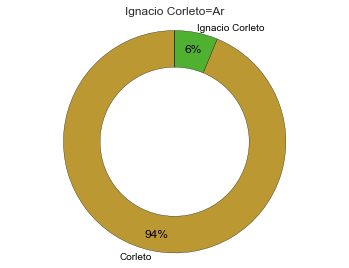

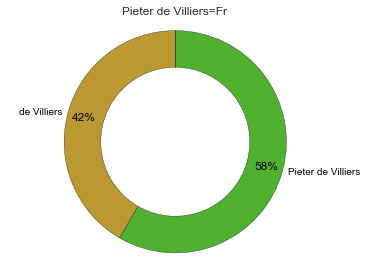

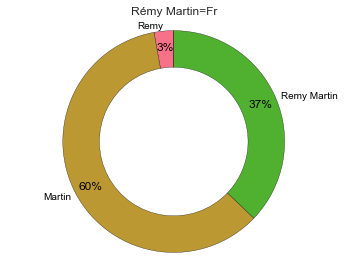

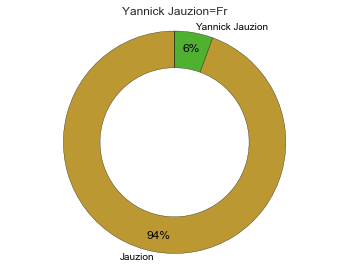

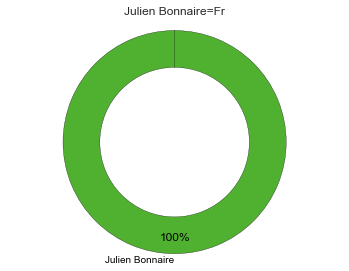

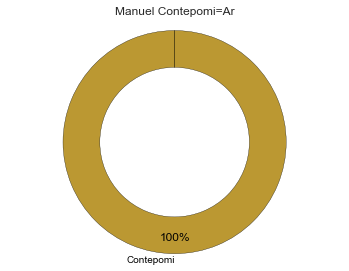

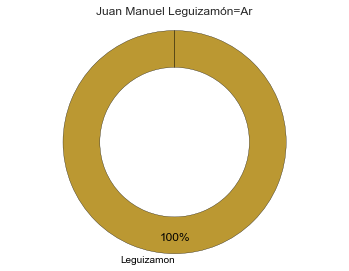

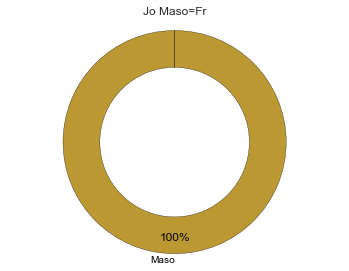

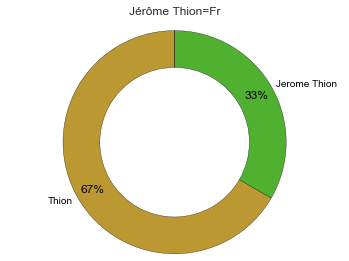

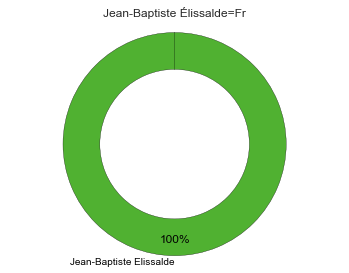

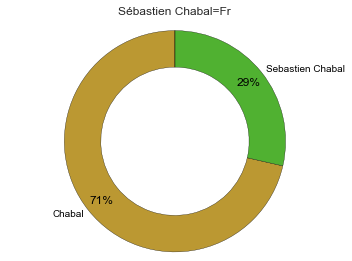

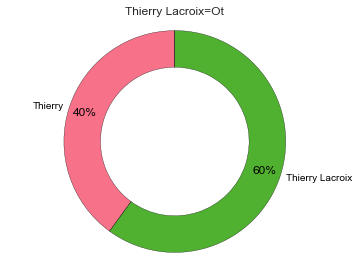

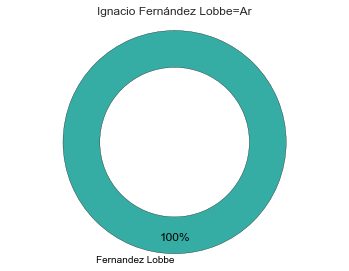

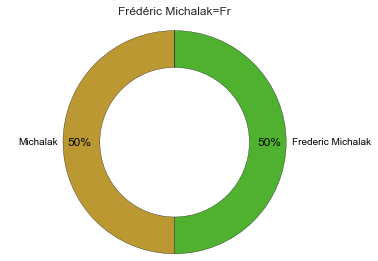

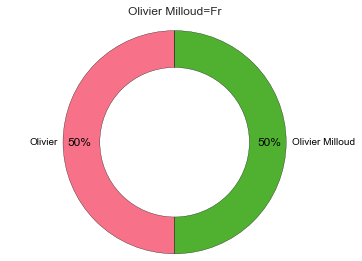

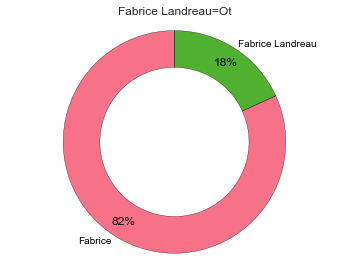

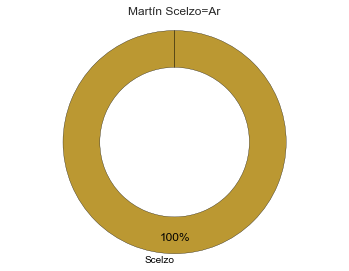

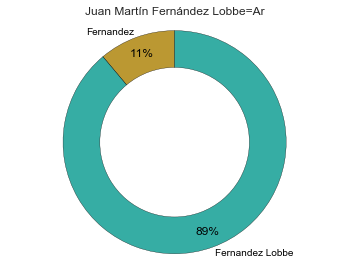

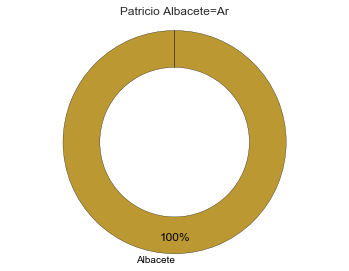

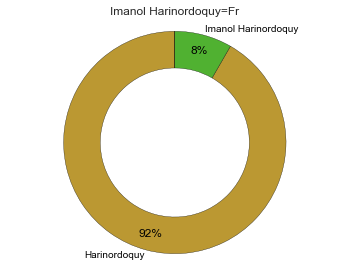

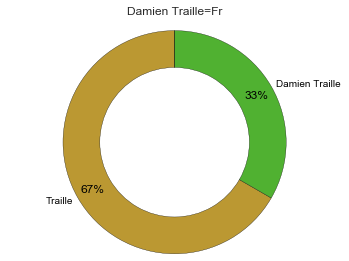

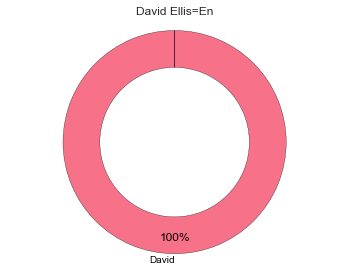

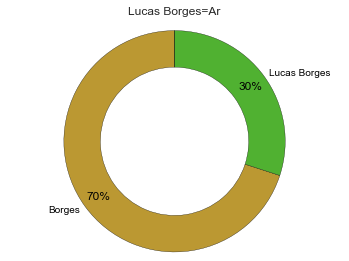

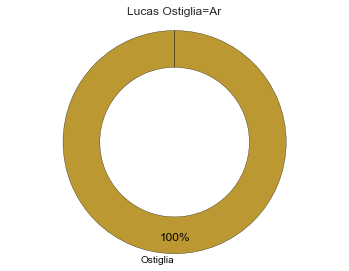

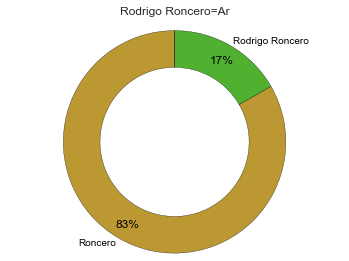

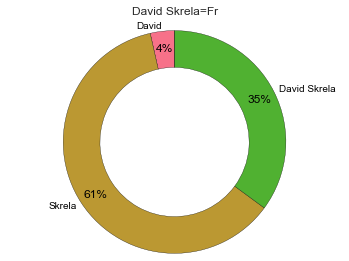

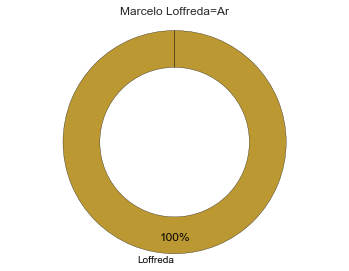

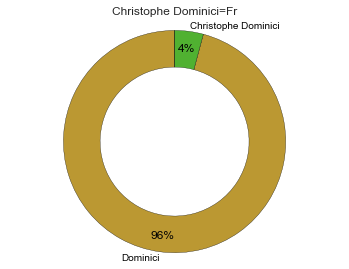

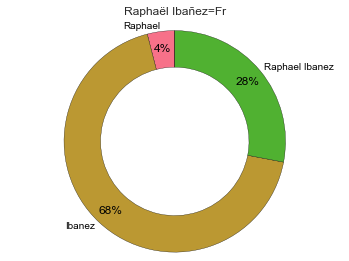

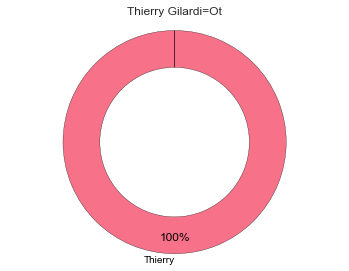

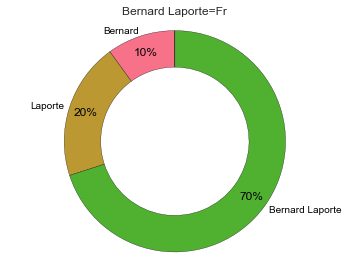

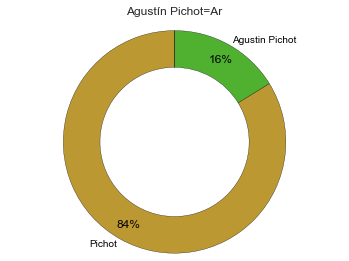

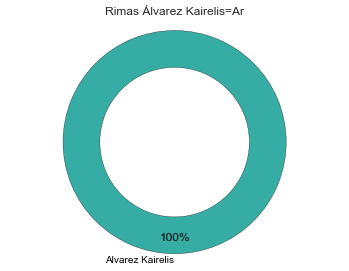

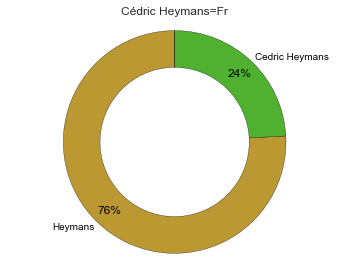

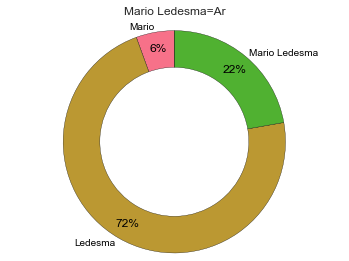

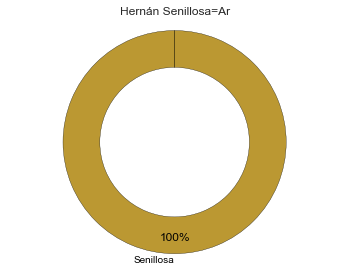

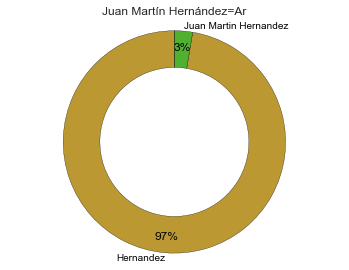

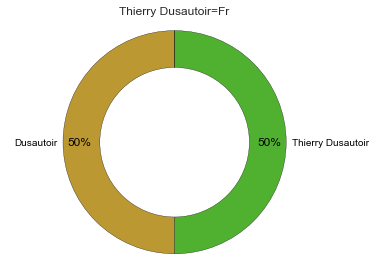

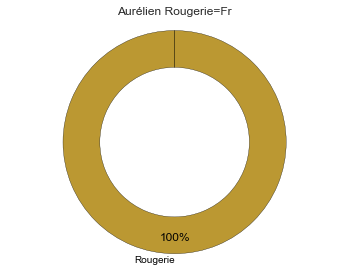

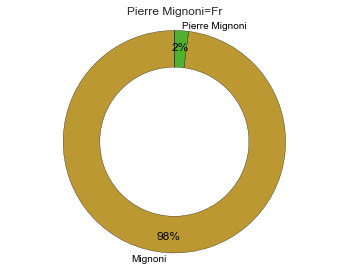

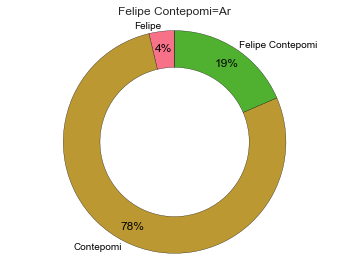

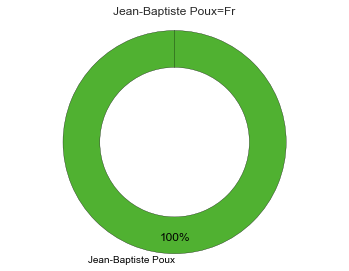

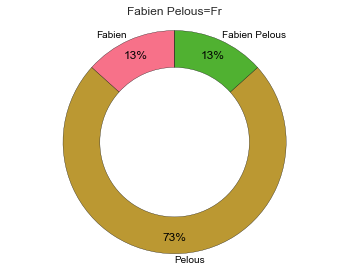

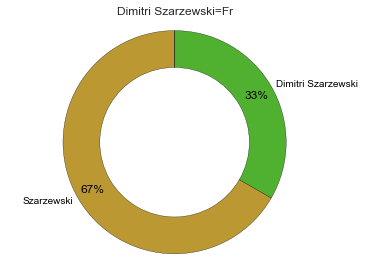

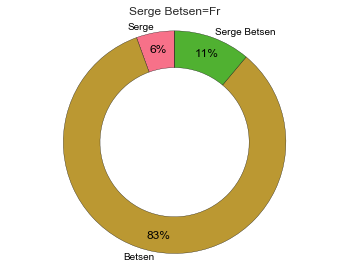

In [346]:
for joueur in joueurDenominations:
    dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][[joueur]].apply(np.sum)
    dfJoueurs=dfJoueurs.append(dfAX.T)
    ax=dfAX.plot(kind="pie",y=joueur,
                 labels=joueurDenominations[joueur],
                 labeldistance=1.05,
                 startangle=90,
                 wedgeprops=dict(width=0.33),
                 radius=1,
                 autopct=lambda p: '%1d%%'%round(p) if round(p) > 0 else '',
                 pctdistance = 0.85,
                 textprops=dict(color="black",
                                ),
                )
    ax.axis('equal')                
    ax.set(ylabel="")
    ax.get_legend().remove()
#    ax.legend(labels=joueurDenominations[joueur],
#          title=u"EN pour %s"%joueur,
#          loc="center left",
#          bbox_to_anchor=(.85, 0, 0.5, 1))
    plt.title(joueur,y=1.05)
#    plt.tight_layout()
#    plt.savefig('PC-Excitation-%s.png'%spkNoms[spk], dpi=150, bbox_inches="tight")
    plt.show()

In [356]:
dfJoueurs["total"]=dfJoueurs[0]+dfJoueurs[1]+dfJoueurs[2]+dfJoueurs[3]
dfJoueurs.columns="prénom nom PN NN total".split(" ")
dfJoueurs

,prénom,nom,PN,NN,total
David Skrela=Fr,2,35,20,0,57
Pierre Mignoni=Fr,0,48,1,0,49
Juan Martín Hernández=Ar,0,37,1,0,38
Agustín Pichot=Ar,0,31,6,0,37
Rémy Martin=Fr,1,21,13,0,35
Thierry Gilardi=Ot,32,0,0,0,32
Cédric Heymans=Fr,0,22,7,0,29
Damien Traille=Fr,0,18,9,0,27
Felipe Contepomi=Ar,1,21,5,0,27
Raphaël Ibañez=Fr,1,17,7,0,25


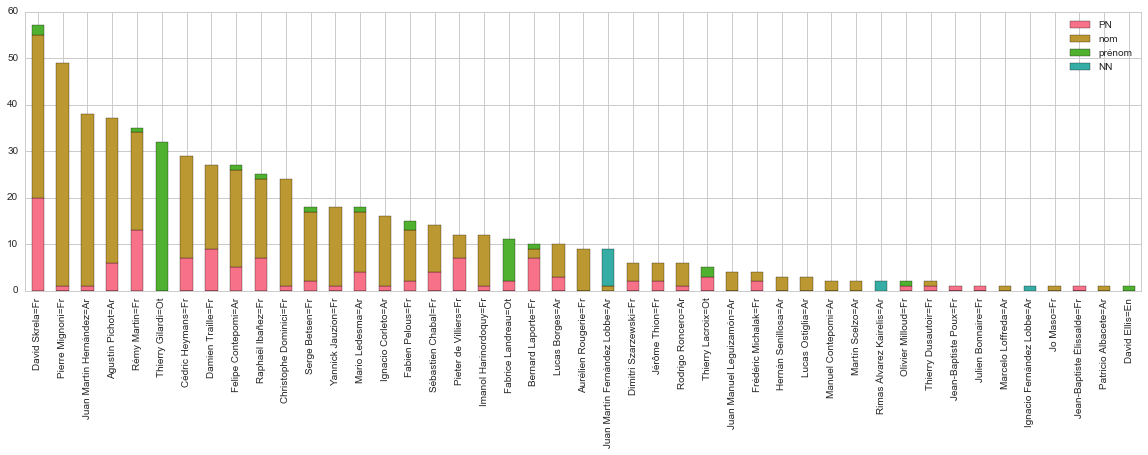

In [359]:
dfJoueurs.sort_values("total",ascending=False).iloc[:][["PN","nom","prénom","NN"]].plot(kind="bar",stacked=True, figsize=(20,5))

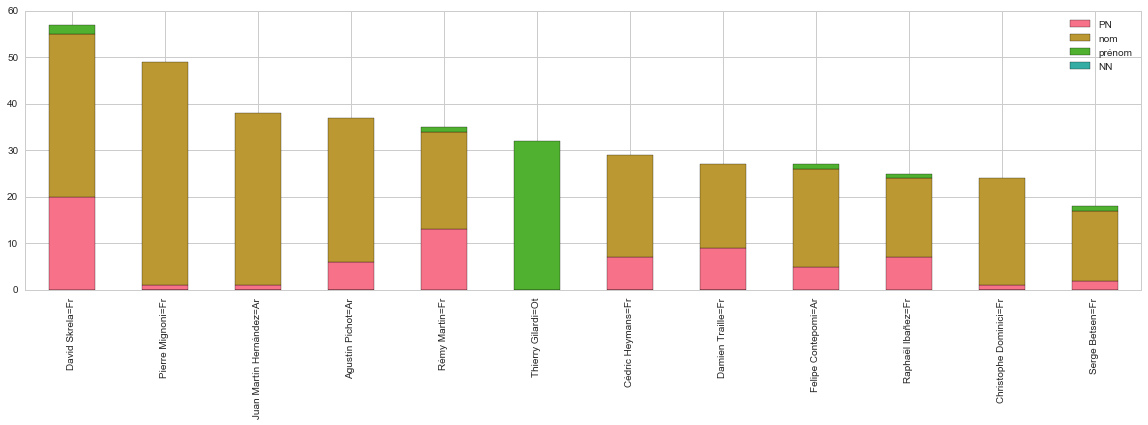

In [360]:
dfJoueurs.sort_values("total",ascending=False).iloc[:12][["PN","nom","prénom","NN"]].plot(kind="bar",stacked=True, figsize=(20,5))

In [226]:
joueur="David Skrela=Fr"
dfNomsMatch[(dfNomsMatch["joueurs"].notnull()) & (dfNomsMatch[joueur]!="0,0,0,0")][["noms",joueur]]

/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/ops.py:1122: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x, y, op)


,noms,David Skrela=Fr
timeline,,
3616.0,David Skrela,"[0, 0, 1, 0]"
9596.0,David Skrela,"[0, 0, 1, 0]"
34336.0,David Skrela,"[0, 0, 1, 0]"
40432.0,David Skrela,"[0, 0, 1, 0]"
42719.0,David Skrela,"[0, 0, 1, 0]"
46768.0,Skrela,"[0, 1, 0, 0]"
48684.0,Skrela,"[0, 1, 0, 0]"
49640.0,Skrela,"[0, 1, 0, 0]"
50040.0,David Skrela,"[0, 0, 1, 0]"


# Graphiques

## Corrélation Entités nommées